In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install livelossplot
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF

In [3]:
PATH_TO_DS = '/content/drive/My Drive/DataSet/UMIC'

In [4]:
img_size = 64
batch_size = 64
train_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_TRAIN = PATH_TO_DS + '/train'
train_data_generator = train_datagen.flow_from_directory(PATH_TO_TRAIN,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

val_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_VAL = PATH_TO_DS + '/Val'
val_data_generator = val_datagen.flow_from_directory(PATH_TO_VAL,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

test_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_TEST = PATH_TO_DS + '/test'
test_data_generator = test_datagen.flow_from_directory(PATH_TO_TEST,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

Found 903 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [5]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(64, 64,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [6]:
epochs = 90
steps_per_epoch = train_data_generator.n//train_data_generator.batch_size
validation_steps = val_data_generator.n//val_data_generator.batch_size

In [7]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/DataSet/UMIC/model_weights.h5", monitor='val_accuracy',save_best_only=True,
                             save_weights_only=True, mode='max', verbose=1)   # saving model with highest accuracy

callbacks = [PlotLossesKerasTF(), checkpoint]                          

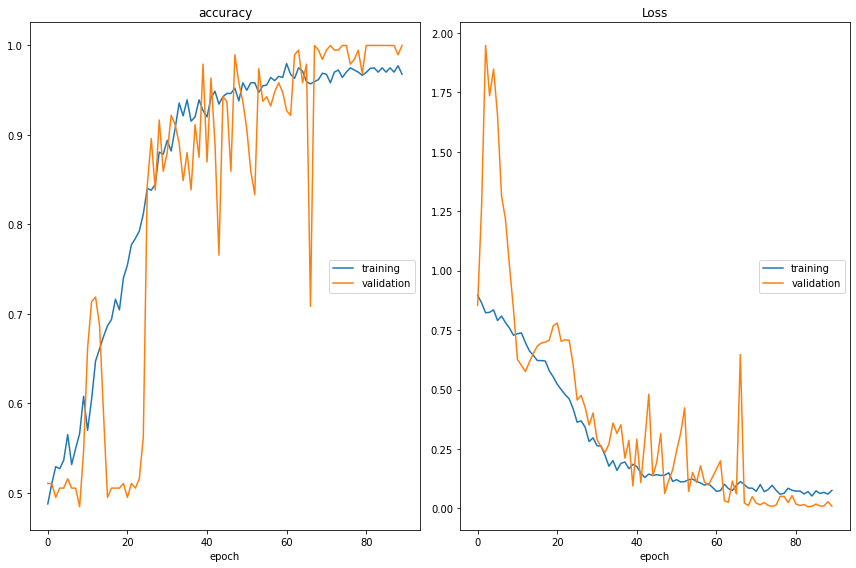

accuracy
	training         	 (min:    0.487, max:    0.980, cur:    0.968)
	validation       	 (min:    0.484, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.052, max:    0.897, cur:    0.076)
	validation       	 (min:    0.007, max:    1.948, cur:    0.009)

Epoch 00090: val_accuracy did not improve from 1.00000
14/14 [==============================] - 3s 210ms/step - loss: 0.0756 - accuracy: 0.9678 - val_loss: 0.0094 - val_accuracy: 1.0000


In [8]:

history = model.fit(
    x=train_data_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = val_data_generator,
    validation_steps = validation_steps,
    callbacks= callbacks
)

In [9]:
model.load_weights("/content/drive/My Drive/DataSet/UMIC/model_weights.h5")

In [10]:
loss, acc = model.evaluate(train_data_generator, verbose=0)
print('{} accuracy on training set'.format(acc))
print('{} loss on training set'.format(loss))

0.9723145365715027 accuracy on training set
0.0718647763133049 loss on training set


In [13]:
loss, acc = model.evaluate(val_data_generator, verbose=0)
print('{} accuracy on validation set'.format(acc))
print('{} loss on validation set'.format(loss))

1.0 accuracy on validation set
0.020996004343032837 loss on validation set


In [14]:
loss, acc = model.evaluate(test_data_generator, verbose=0)
print('{} accuracy on test set'.format(acc))
print('{} loss on test set'.format(loss))

0.9795918464660645 accuracy on test set
0.06311477720737457 loss on test set
